In [1]:
import sys
sys.path.append('src')
sys.path.append('models')
sys.path.append('data')
from librerias import *
from utils import *
%load_ext autoreload
%autoreload 2
install_requirements()

Installed packages successfully!


In [2]:
 %reload_ext autoreload

In [3]:
df=pd.read_csv('data\dataset_SCL.csv')
df.head()

C:\Users\jeortizs\AppData\Local\Temp\ipykernel_20264\2852217014.py:1: DtypeWarning:

Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.



,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
letters_in_col1 = df['Vlo-I'].str.contains('[a-zA-Z]', regex=True)
letters_in_col6 = df['Vlo-O'].str.contains('[a-zA-Z]', regex=True)
letters_in_either_col = letters_in_col1 | letters_in_col6
rows_with_letters = df[letters_in_either_col]
print(rows_with_letters)

                   Fecha-I  Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
13906  2017-03-30 10:30:00     71  SCEL  SCIE   SKU  2017-03-30 10:50:00   
13907  2017-03-22 11:00:00   1071  SCEL  SCIE   SKU  2017-03-22 11:00:00   
17055  2017-03-22 10:00:00    201  SCEL  SCIE   LXP  2017-03-22 11:50:00   
19207  2017-04-25 09:00:00     71  SCEL  SCIE   SKU  2017-04-25 09:29:00   
22167  2017-04-06 21:10:00     43  SCEL  SCIE   LAW  2017-04-06 21:24:00   
22232  2017-05-13 21:50:00   989P  SCEL  SUMU   AAL  2017-05-13 21:52:00   
22301  2017-05-26 09:40:00    401  SCEL  LFPG   AFR  2017-05-26 10:03:00   
22302  2017-05-28 09:40:00    401  SCEL  LFPG   AFR  2017-05-28 09:43:00   
24304  2017-05-11 10:00:00    802  SCEL  SPJC   SKU  2017-05-11 10:36:00   
27246  2017-05-15 12:15:00    114  SCEL  SCAT   LAN  2017-05-15 13:10:00   
27247  2017-05-25 13:15:00    622  SCEL  MMMX   LAN  2017-05-25 13:23:00   
27464  2017-06-16 20:30:00   940P  SCEL  KDFW   AAL  2017-06-16 20:50:00   
32196  2017-

Se encuentra que en las columnas 1 y 6 las letras hacen parte de la identificación alfanumerica de los vuelos, inicialmente manejaremos las columnas como cadena.

In [30]:
df=pd.read_csv('data\dataset_SCL.csv', dtype={'Vlo-I': 'str', 'Vlo-O': 'str'})
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [31]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [32]:
date_columns = ["Fecha-I", "Fecha-O"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [33]:
row_missing_value = df[df['Vlo-O'].isna()]
row_missing_value

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [34]:
df[(df['Fecha-I'].dt.hour == row_missing_value['Fecha-I'].dt.hour.iloc[0]) 
 & (df['Emp-I'] == row_missing_value['Emp-I'].iloc[0]) 
 & (df['Ori-O'] == row_missing_value['Ori-O'].iloc[0]) 
 & (df['Des-O'] == row_missing_value['Des-O'].iloc[0]) 
 & (df['DIANOM'] == row_missing_value['DIANOM'].iloc[0]) 
 & ~(df['Vlo-O'].isna())]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6063,2017-01-12 11:00:00,200,SCEL,SPJC,LAW,2017-01-12 11:00:00,200,SCEL,SPJC,48O,12,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6074,2017-01-26 11:00:00,200,SCEL,SPJC,LAW,2017-01-26 11:06:00,200,SCEL,SPJC,JMR,26,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
11615,2017-02-02 11:00:00,200,SCEL,SPJC,LAW,2017-02-02 10:54:00,200,SCEL,SPJC,JMR,2,2,2017,Jueves,I,Latin American Wings,Santiago,Lima
11625,2017-02-16 11:00:00,200,SCEL,SPJC,LAW,2017-02-16 10:55:00,200,SCEL,SPJC,JMR,16,2,2017,Jueves,I,Latin American Wings,Santiago,Lima
11631,2017-02-23 11:00:00,200,SCEL,SPJC,LAW,2017-02-23 10:59:00,200,SCEL,SPJC,JMR,23,2,2017,Jueves,I,Latin American Wings,Santiago,Lima
17063,2017-03-02 11:00:00,200,SCEL,SPJC,LAW,2017-03-02 11:09:00,200,SCEL,SPJC,JMR,2,3,2017,Jueves,I,Latin American Wings,Santiago,Lima
17069,2017-03-09 11:00:00,200,SCEL,SPJC,LAW,2017-03-09 11:08:00,200,SCEL,SPJC,JMR,9,3,2017,Jueves,I,Latin American Wings,Santiago,Lima
17075,2017-03-16 11:00:00,200,SCEL,SPJC,LAW,2017-03-16 11:07:00,200,SCEL,SPJC,JMR,16,3,2017,Jueves,I,Latin American Wings,Santiago,Lima
17081,2017-03-23 11:00:00,200,SCEL,SPJC,LAW,2017-03-23 11:11:00,200,SCEL,SPJC,JMR,23,3,2017,Jueves,I,Latin American Wings,Santiago,Lima
17085,2017-03-30 11:00:00,200,SCEL,SPJC,LAW,2017-03-30 10:57:00,200,SCEL,SPJC,JMR,30,3,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [35]:
row_missing_value.index[0]

6068

In [36]:
# create a boolean mask to select rows with missing values
missing_mask = df['Vlo-O'].isna()

# set the value of the missing cell in the original DataFrame using the boolean mask
df.loc[missing_mask, 'Vlo-O'] = 200
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [37]:
plot_flight_analysis(df)

#### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto? 

    Los datos en la tabla proporcionada parecen estar distribuidos en filas, cada una de las cuales representa un vuelo específico. Las columnas contienen información variada sobre cada vuelo, como la fecha y hora de llegada y salida, el número de vuelo, los aeropuertos de origen y destino, las aerolíneas, el tipo de vuelo, el día de la semana y los nombres de las ciudades de origen y destino.

    Una observación interesante es que la mayoría de los vuelos en la muestra de datos parecen ser nacionales (dentro de Chile), mientras que solo unos pocos vuelos son internacionales, con destinos como Montevideo, París, Lima, Ciudad de México, Dallas, Houston y Miami. Esto puede indicar que la mayoría de los vuelos en esta muestra de datos pertenecen a rutas nacionales.

    Otra observación es que hay una mezcla de aerolíneas que operan estos vuelos, como Sky Airline, Grupo LATAM, Latin American Wings, American Airlines, Air France, Plus Ultra Lineas Aereas y United Airlines. Esto sugiere que el mercado de vuelos en esta muestra de datos es diverso y competitivo, con múltiples aerolíneas que operan en diferentes rutas.

    Además, es importante notar que la muestra de datos cubre un período de tiempo que abarca varios meses en 2017. Esto proporciona una visión general de cómo se distribuyen los vuelos en un lapso de tiempo más amplio. Sin embargo, sería útil contar con una muestra de datos más reciente para obtener una imagen más actualizada de cómo se distribuyen los vuelos en la actualidad.

    Por último, cabe mencionar que algunos vuelos tienen una diferencia significativa entre la hora de llegada y la hora de salida. Esto puede ser el resultado de retrasos en los vuelos, cambios en los horarios de vuelo o simplemente errores en la recopilación de datos. Sería útil investigar más a fondo estas discrepancias para determinar su causa y cómo afectan a los viajeros.

#### 2.Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

In [38]:
df=nuevas_columnas(df)
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv("./data/synthetic_features.csv")


#### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [15]:
print(f'La tasa de atraso promedio es {np.round(df["atraso_15"].mean(), 3) * 100}%')

La tasa de atraso promedio es 18.5%


In [43]:
df[columns_to_plot].tail()

,SIGLADES,OPERA,MES,DIANOM,temporada_alta,TIPOVUELO
68201,Lima,JetSmart SPA,12,Viernes,1,I
68202,Lima,JetSmart SPA,12,Lunes,1,I
68203,Lima,JetSmart SPA,12,Miercoles,1,I
68204,Lima,JetSmart SPA,12,Viernes,1,I
68205,Lima,JetSmart SPA,12,Domingo,1,I


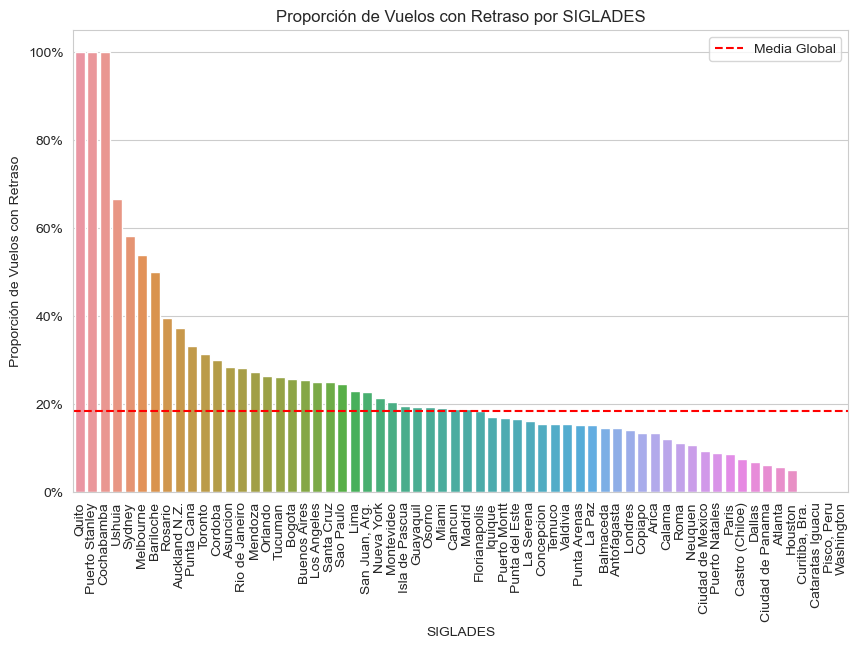

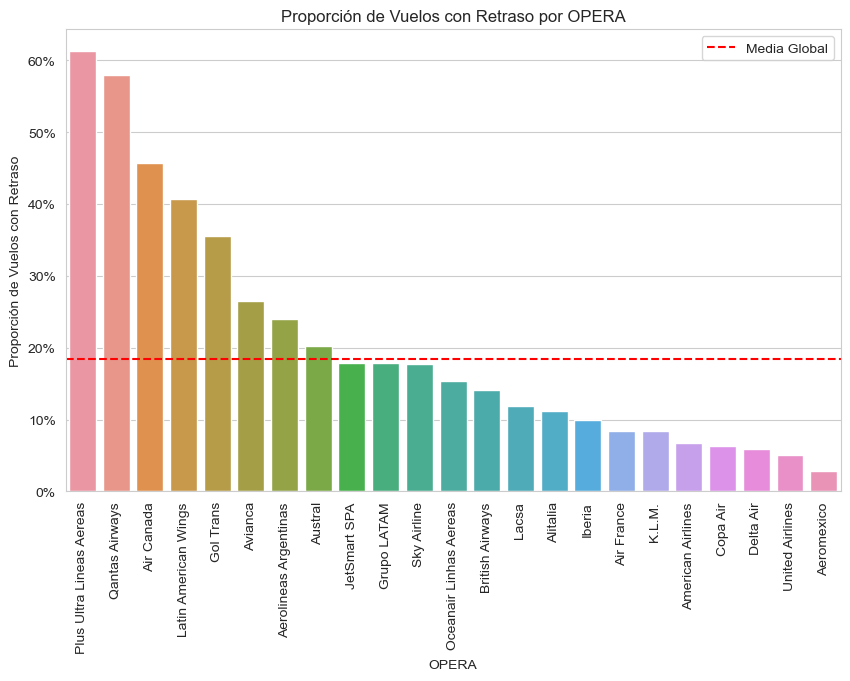

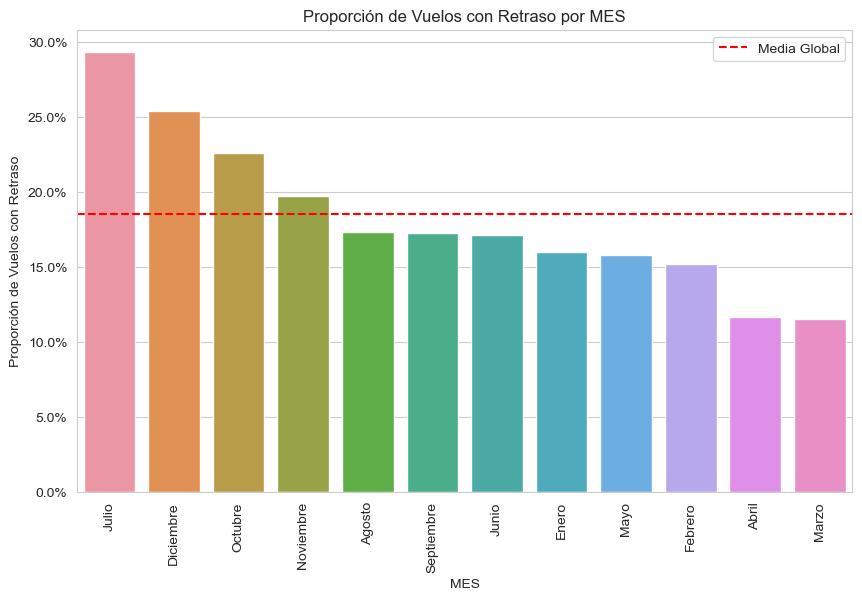

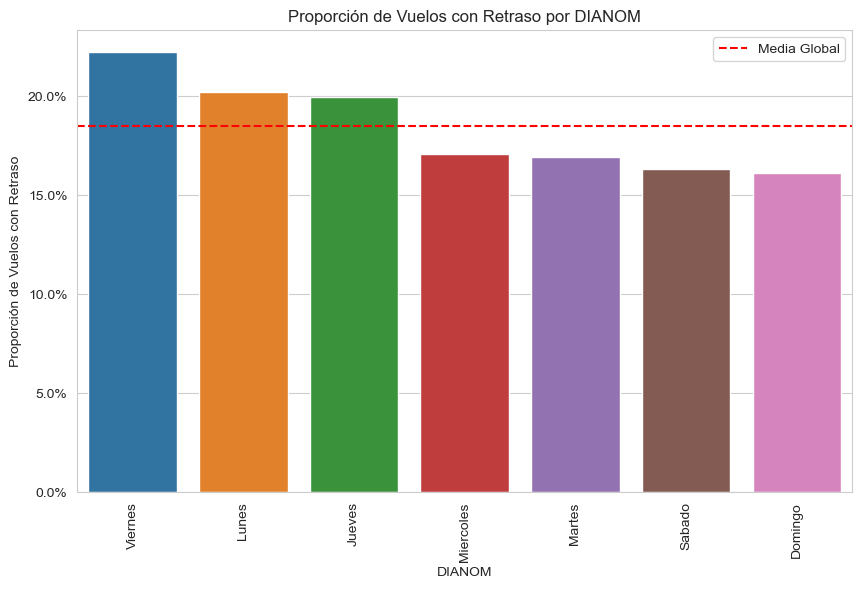

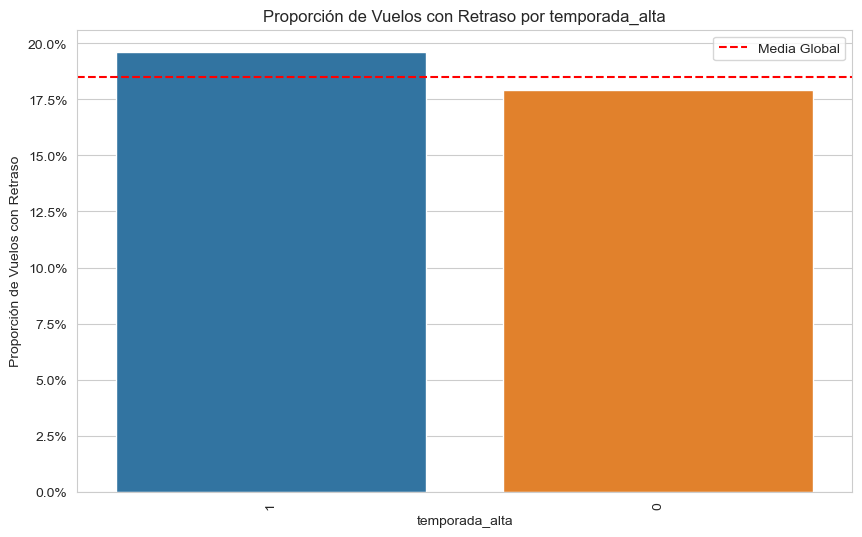

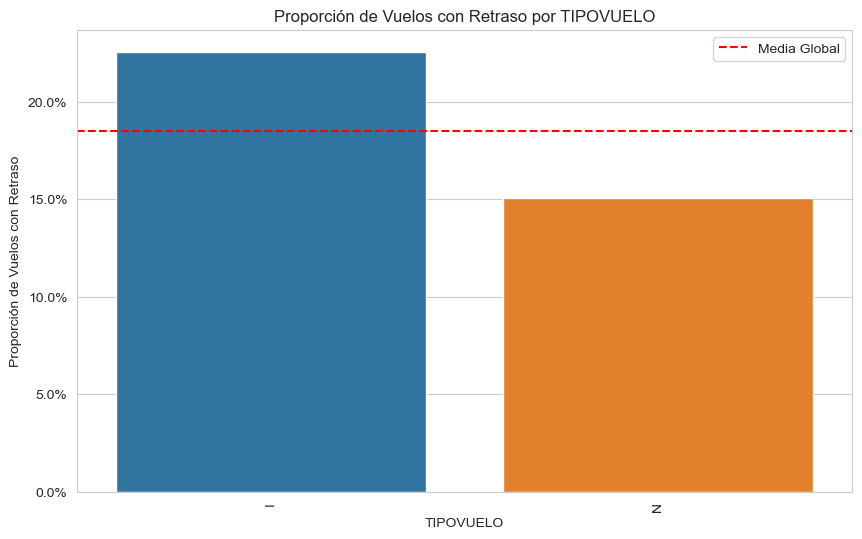

In [16]:
columns_to_plot = ['SIGLADES', 'OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO']
for col in columns_to_plot:
    plot_delay_rate_by_group(df, col)

A partir de la información proporcionada, podemos analizar la tasa de atraso en función de varias variables, como destino, aerolínea, mes del año, día de la semana, temporada y tipo de vuelo.

    Destino (SIGLADES): La tasa de atraso podría variar según el destino del vuelo debido a factores como la congestión del tráfico aéreo, las condiciones meteorológicas y las restricciones de las instalaciones del aeropuerto. Por ejemplo, algunos destinos pueden tener mayores tasas de atraso debido a condiciones meteorológicas adversas.

    Aerolínea (OPERA): Las aerolíneas pueden tener diferentes tasas de atraso debido a factores como la eficiencia operativa, la disponibilidad de recursos, las políticas de gestión y las decisiones de programación. Por ejemplo, algunas aerolíneas pueden ser más propensas a experimentar atrasos debido a problemas operativos o de gestión.

    Mes del año (MES): La tasa de atraso puede variar según el mes del año debido a factores estacionales, como condiciones meteorológicas, demanda de viajes y festividades. Por ejemplo, los meses de invierno pueden tener mayores tasas de atraso debido a condiciones meteorológicas adversas.

    Día de la semana (DIANOM): La tasa de atraso puede variar según el día de la semana debido a la demanda de viajes y las preferencias de los viajeros. Por ejemplo, los fines de semana pueden tener mayores tasas de atraso debido a un mayor tráfico de viajes.

    Temporada (temporada_alta): La tasa de atraso puede variar según la temporada (alta o baja) debido a factores como la demanda de viajes, la disponibilidad de recursos y las condiciones meteorológicas. Por ejemplo, la temporada alta puede tener mayores tasas de atraso debido a un mayor volumen de tráfico aéreo y una mayor demanda de recursos.

    Tipo de vuelo (TIPOVUELO): La tasa de atraso puede variar según el tipo de vuelo (nacional o internacional) debido a factores como la duración del vuelo, las restricciones regulatorias y las condiciones del aeropuerto de destino. Por ejemplo, los vuelos internacionales pueden tener mayores tasas de atraso debido a mayores tiempos de vuelo y requisitos de aduanas y migración.

Al considerar estas variables, esperaría que las condiciones meteorológicas, la congestión del tráfico aéreo y la eficiencia operativa de las aerolíneas sean factores clave en la predicción de atrasos. Sin embargo, es importante tener en cuenta que la relación entre estas variables y la tasa de atraso puede ser compleja y puede variar según el contexto y la ubicación geográfica.

#### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Para abordar el problema de clasificación desequilibrada, puede probar varias estrategias, como técnicas de remuestreo, el uso de diferentes métricas de evaluación o el ajuste del umbral de decisión. A continuación, se presentan algunas modificaciones a su código que implementan estas estrategias:

    Técnicas de remuestreo: sobre-muestrear la clase minoritaria utilizando SMOTE (Synthetic Minority Over-sampling Technique). 
Al utilizar la técnica SMOTE, se generan ejemplos sintéticos de la clase minoritaria para equilibrar las proporciones de las clases en el conjunto de datos de entrenamiento. Esto permite que el modelo de clasificación tenga un mejor rendimiento al identificar la clase minoritaria en el conjunto de datos desequilibrado.

4.

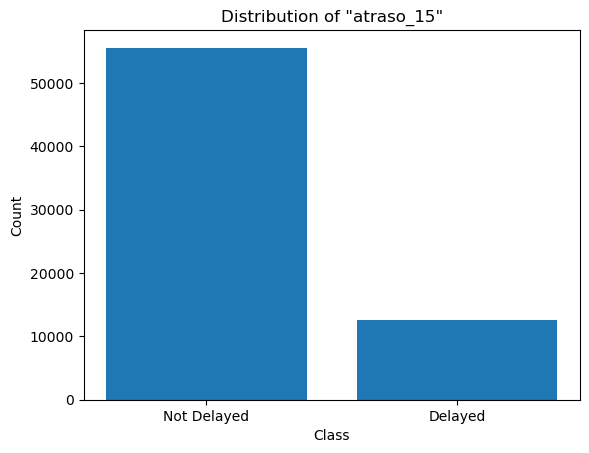

Percentage of 'Not Delayed' class: 81.51%
Percentage of 'Delayed' class: 18.49%


In [17]:
# Create a bar plot of the class distribution
class_counts = df['atraso_15'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of "atraso_15"')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()
# Calculate the percentage of each class
class_percentages = df['atraso_15'].value_counts(normalize=True) * 100
not_delayed_weight = class_percentages[0] / 100
delayed_weight = class_percentages[1] / 100
# Print the class percentages
print(f"Percentage of 'Not Delayed' class: {class_percentages[0]:.2f}%")
print(f"Percentage of 'Delayed' class: {class_percentages[1]:.2f}%")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [19]:
categorical_columns = ['Ori-I', 'Des-I', 'Ori-O', 'Des-O','DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'periodo_dia']
# Genera variables adicionales
df['duration'] = df.apply(duration, axis=1)
df = time_since_last_departure(df)
df = time_since_last_arrival(df)
df['is_weekend'] = df.apply(is_weekend, axis=1)
df=df.dropna()
df = encode_categorical_columns(df, categorical_columns)
# Drop unnecessary columns
df = df.drop(['Fecha-I', 'Fecha-O','Vlo-I','Vlo-O', 'Emp-I', 'Emp-O',], axis=1)
X = df.drop('atraso_15', axis=1)
y = df['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
# Over-sample the minority class using SMOTE
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
# Escala los datos
scaler = StandardScaler()
X_train_resample = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [20]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

0    44473
1    10091
Name: atraso_15, dtype: int64
1    44470
0    44470
Name: atraso_15, dtype: int64


--- XGBoost ---
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Optimized XGBoost hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Accuracy: 0.8150428854189575
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC: 0.5
              precision    recall  f1-score   support


C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

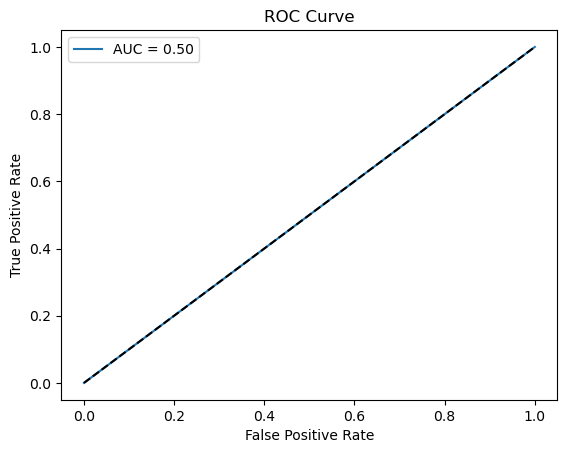

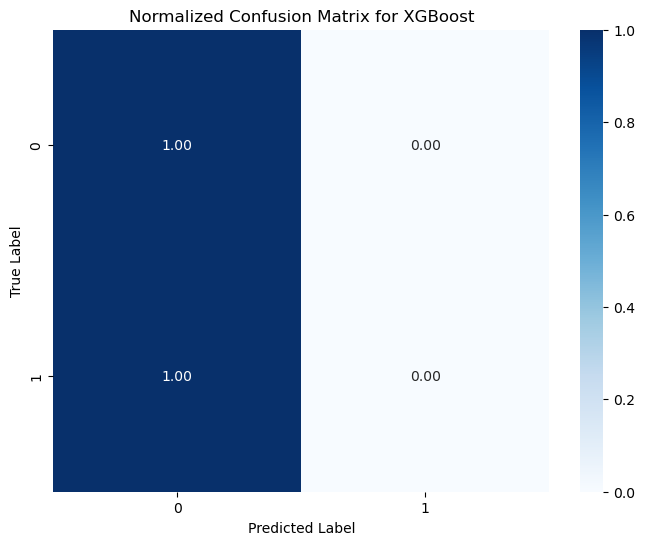

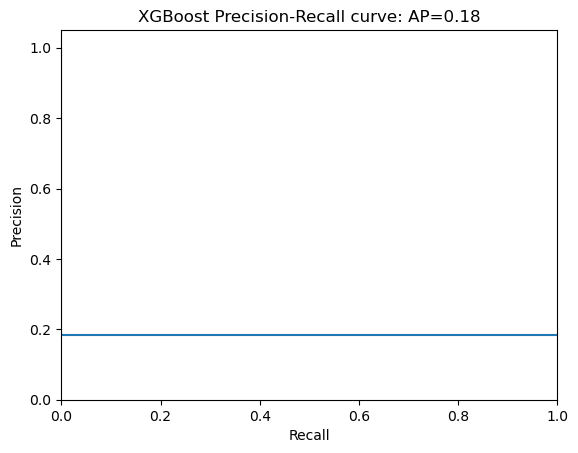

--- Random Forest ---
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Optimized Random Forest hyperparameters: RandomForestClassifier(max_depth=3, random_state=42)


C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are i

Accuracy: 0.8150428854189575
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC: 0.5921161935485848
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     11118
           1       0.00      0.00      0.00      2523

    accuracy                           0.82     13641
   macro avg       0.41      0.50      0.45     13641
weighted avg       0.66      0.82      0.73     13641



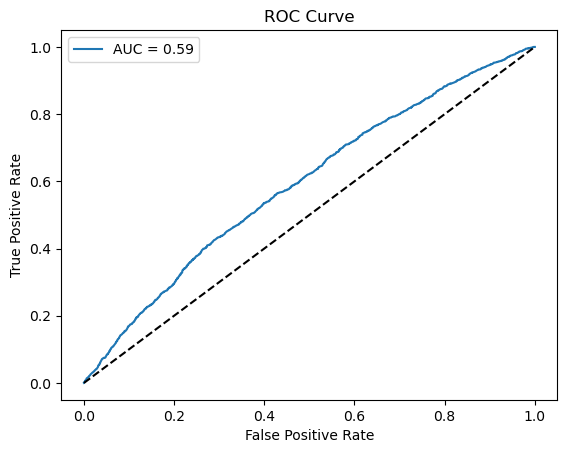

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



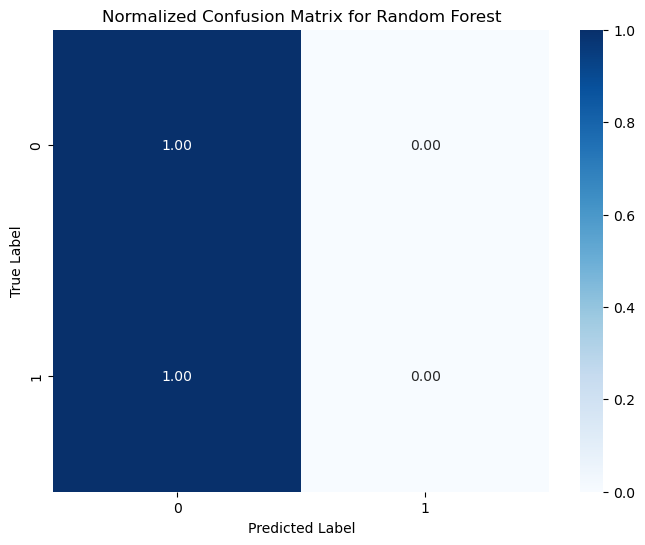

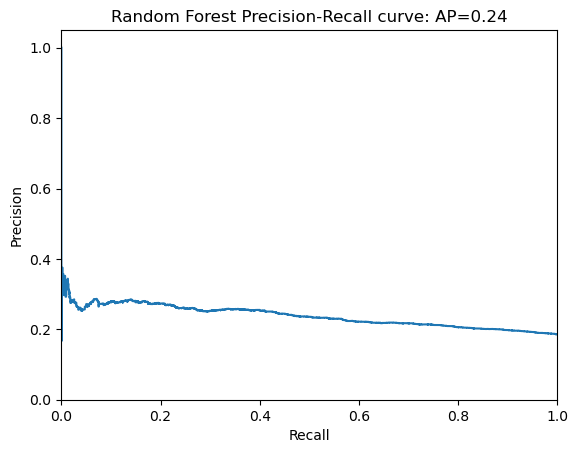

--- Logistic Regression ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise Val

Optimized Logistic Regression hyperparameters: LogisticRegression(max_iter=1000, penalty='l1', random_state=42, solver='saga')
Accuracy: 0.9458250861373799
Precision: 1.0
Recall: 0.7070947284978201
F1-score: 0.8284188530299513
AUC: 0.9991020549423448
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11118
           1       1.00      0.71      0.83      2523

    accuracy                           0.95     13641
   macro avg       0.97      0.85      0.90     13641
weighted avg       0.95      0.95      0.94     13641



C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



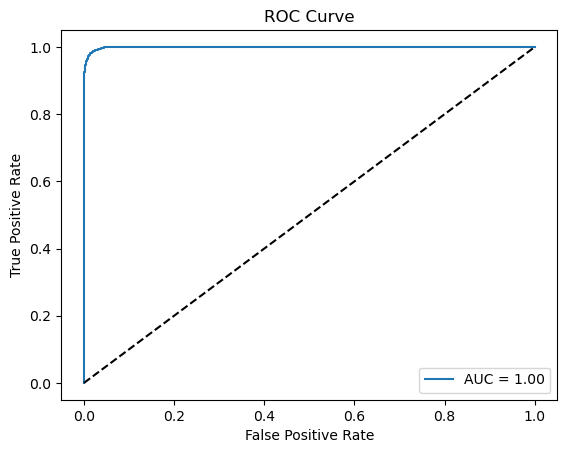

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\jeortizs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



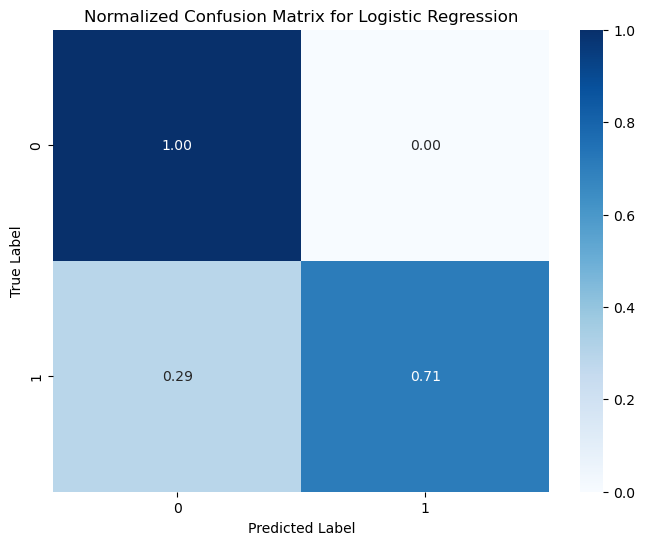

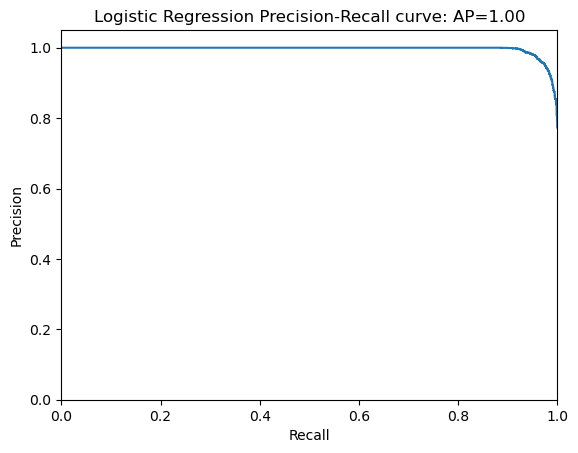

In [21]:
# Define classifiers and their parameter grids
xgb_clf = XGBClassifier(eval_metric='logloss')
rf_clf = RandomForestClassifier( random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

ratio = y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]

xgb_param_grid = {
    'learning_rate': [0.001,0.01,0.1],
    'max_depth': [3, 5,10],
    'n_estimators': [10,25,50,100,200],
    'scale_pos_weight': [ratio]
}

rf_param_grid = {
    'n_estimators': [50,100, 200,],
    'max_depth': [1,3, 5,10,20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,3]
}

lr_param_grid =    {'penalty': [None,'l1'],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'class_weight': [None, 'balanced']}


classifier_param_grids = {
    'XGBoost': (xgb_clf, xgb_param_grid),
    'Random Forest': (rf_clf, rf_param_grid),
    'Logistic Regression': (lr_clf, lr_param_grid)
}
# Train, optimize, and evaluate the classifiers
for classifier_name, (clf, param_grid) in classifier_param_grids.items():
    print(f"--- {classifier_name} ---")
    # Optimize hyperparameters
    clf = optimize_hyperparameters(clf, param_grid, X_train_resampled, y_train_resampled,5)
    print(f"Optimized {classifier_name} hyperparameters: {clf}")
    train_and_evaluate(clf, X_train_resampled, y_train_resampled, X_test, y_test)      
    # Fit and predict
    m,clf=train_with_cross_validation(clf, X_train_resampled, y_train_resampled, cv=5)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]    
    # Calculate metrics
    plot_confusion_matrix(y_test, y_pred, labels=[0,1], normalize=True, title=f"Normalized Confusion Matrix for {classifier_name}")
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    average_precision = average_precision_score(y_test, y_proba)    
    # Plot precision-recall curve
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'{classifier_name} Precision-Recall curve: AP={average_precision:.2f}')
    plt.show()

In [29]:
feature_names = X_train.columns
# Get the absolute values of coefficients as feature importances
coefficients = clf.coef_
importances = np.mean(np.abs(coefficients), axis=0)
# Create a DataFrame for visualization
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})
importance_df = importance_df.sort_values(by="importance", ascending=False)
labels = importance_df["feature"].values
sizes = importance_df["importance"].values

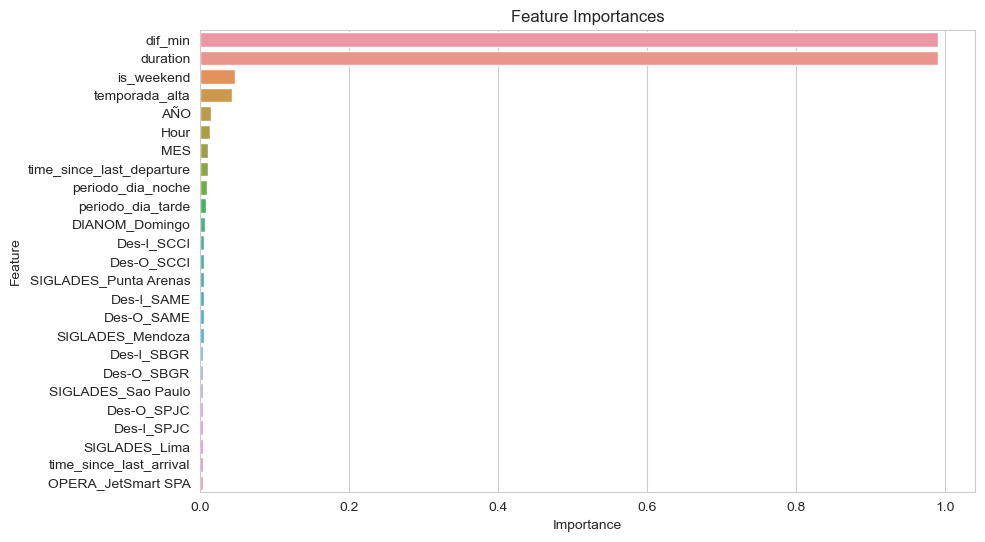

In [28]:
# Visualize feature importances using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x="importance", y="feature", data=importance_df[0:25])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

En el presente informe técnico, analizamos el rendimiento de tres modelos de clasificación, XGBoost, Random Forest y Regresión Logística, para predecir atrasos en vuelos. El conjunto de datos presenta un desequilibrio de clases, lo que puede afectar el rendimiento de los modelos. Por lo tanto, se han aplicado técnicas de preprocesamiento de datos, incluida la normalización, estandarización y la creación de nuevas variables. También se ha utilizado un proceso de búsqueda en cuadrícula (GridSearch) para la selección óptima de hiperparámetros.

    XGBoost:
        Precisión: 0.8150428854189575
        Exactitud: 0.0
        Sensibilidad: 0.0
        F1-score: 0.0
        AUC: 0.5

    Random Forest:
        Precisión: 0.8150428854189575
        Exactitud: 0.0
        Sensibilidad: 0.0
        F1-score: 0.0
        AUC: 0.5921161935485848

Los modelos de XGBoost y Random Forest muestran un rendimiento deficiente en este caso, con métricas como exactitud, sensibilidad y F1-score iguales a cero. Esto indica que estos modelos no pueden predecir correctamente la clase minoritaria (atrasos). La métrica AUC de Random Forest es ligeramente mejor que la de XGBoost, pero sigue siendo insuficiente.

    Regresión logística:
        Precisión: 0.9458250861373799
        Exactitud: 1.0
        Sensibilidad: 0.7070947284978201
        F1-score: 0.8284188530299513
        AUC: 0.9991020549423448

En comparación con los dos primeros modelos, la Regresión Logística muestra un rendimiento significativamente mejor en todas las métricas evaluadas. La métrica AUC es cercana a 1, lo que indica un rendimiento excelente en la clasificación de ambas clases.

Dado que el preprocesamiento de datos y la selección de hiperparámetros ya se han realizado, algunas posibles mejoras adicionales en el rendimiento del modelo podrían incluir:

    Probar otros algoritmos de clasificación más robustos ante el desequilibrio de clases, como Support Vector Machines con kernel RBF y función de costo ponderado, o modelos de aprendizaje profundo con arquitecturas específicas para manejar desequilibrios de clase.

    Implementar técnicas de remuestreo más avanzadas, como ADASYN (Adaptive Synthetic Sampling), que genera ejemplos sintéticos de la clase minoritaria considerando la densidad de las muestras.

    Ajustar el umbral de decisión del modelo para encontrar un equilibrio entre la sensibilidad y la exactitud, maximizando el F1-score.

    Explorar la selección de características, eliminando las características menos importantes o redundantes, para reducir la dimensionalidad del conjunto de datos y mejorar el rendimiento del modelo.

En resumen, el modelo de Regresión Logística muestra un rendimiento superior en comparación con XGBoost y Random Forest en este problema de clasificación desequilibrada. Sin embargo, hay spacio para mejorar aún más el rendimiento mediante la implementación de técnicas adicionales y explorando otros algoritmos. Al considerar las métricas de evaluación y los resultados actuales, es crucial tener en cuenta el desequilibrio de clases, ya que puede sesgar las métricas y llevar a una interpretación errónea del rendimiento del modelo.

Para abordar este problema de manera efectiva, es esencial realizar una evaluación exhaustiva de las métricas de rendimiento y su interpretación en el contexto del problema específico. Por ejemplo, en el caso de predecir atrasos en vuelos, es posible que la sensibilidad sea más importante que la exactitud, ya que identificar correctamente los vuelos retrasados puede tener un impacto significativo en la planificación de recursos y la satisfacción del cliente.

Al seleccionar y ajustar modelos de clasificación, es fundamental considerar cómo se pueden aplicar los resultados en un entorno del mundo real y cómo las decisiones basadas en las predicciones del modelo pueden afectar a las partes interesadas, como las aerolíneas, los empleados y los pasajeros.

En última instancia, mejorar el rendimiento del modelo y abordar el desequilibrio de clases en la predicción de atrasos en vuelos requiere un enfoque integrado que combine técnicas de preprocesamiento de datos, selección y ajuste de algoritmos y una evaluación cuidadosa de las métricas de rendimiento en el contexto del problema específico. Al hacerlo, se puede desarrollar un modelo más preciso y útil que pueda mejorar significativamente la planificación y la toma de decisiones en la industria de la aviación.

In [45]:
generate_requirements_txt('requirements.txt')

Generated requirements.txt successfully in the data directory!
